# Gradient Boosted Tree

Developers: Danielle Shackley, Brendan Dao Principals of Machine Learning Final Project Description: This script uses the 'adult' data csv file to create a Gradient Boosted decision tree with 4 levels and plots the feature importance. The data is transformed into numerical values with a labelEncoder function.

In [10]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from sklearn.ensemble import GradientBoostingClassifier
import sys

In [11]:
df=pd.read_csv("adult.csv")
#df
X=df.iloc[:,0:14]
y=df.iloc[:,-1]
#np.array(headers)
headers = np.array(list(df.columns[:-1].T))

In [12]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y=le.fit_transform(y)

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X=enc.fit_transform(X)
X.shape

(32561, 14)

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.869
Accuracy on test set: 0.862


In [19]:
gbrt1=GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt1.score(X_test, y_test)))

Accuracy on training set: 0.852
Accuracy on test set: 0.849


In [20]:
gbrt2=GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt2.score(X_test, y_test)))

Accuracy on training set: 0.833
Accuracy on test set: 0.828


In [22]:
#Feature Importance
def plot_feature_importances_adult(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (list(df.columns[:-1].T)))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


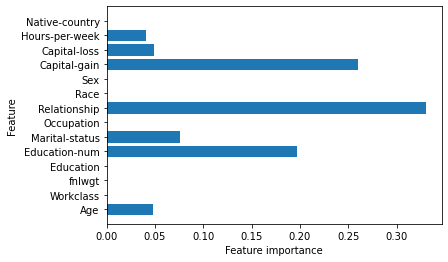

In [23]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth = 1)
gbrt.fit(X_train, y_train)
plot_feature_importances_adult(gbrt)